# Getting Started

This is a simple example of the basic capabilities of `aneris`.

First, model and history data are read in. The model is then harmonized. Finally, output is analyzed.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import aneris
from aneris.tutorial import load_data

%matplotlib inline

The `driver` is used to execute the harmonization. It will handle the data formatting needed to execute the harmonizaiton operation and stores the harmonized results until they are needed.

Some logging output is provided. It can be suppressed with 

```
aneris.logger().setLevel('WARN')
```

In [2]:
model, hist, driver = load_data()
for scenario in driver.scenarios():
    driver.harmonize(scenario)
harmonized, metadata, diagnostics = driver.harmonized_results()

/home/gidden/.local/lib/python2.7/site-packages/pandas/util/_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)
INFO:root:Downselecting prefix|suffix variables
INFO:root:Translating to standard format
INFO:root:Aggregating historical values to native regions
INFO:root:Harmonizing (with example methods):
INFO:root:                                                    method            default  \
region  gas sector                units                                         
regionc BC  prefix|sector1|suffix kt     reduce_ratio_2100  reduce_ratio_2080   
            prefix|sector2|suffix kt     reduce_ratio_2100  reduce_ratio_2080   

                                                  override  
region  gas sector                units                     
regionc BC  prefix|sector1|suffix kt     reduce_ratio_2100  
            prefix|sector2|suffix kt     reduce_ratio_2100  
INFO:root:and override methods:
INFO:r

All data of interest is combined in order to easily view it. We will specifically investigate output for the `World` in this example. A few operations are performed in order to get the data into a plotting-friendly format.

In [3]:
data = pd.concat([hist, model, harmonized])
df = data[data.Region.isin(['World'])]

In [4]:
df = pd.melt(df, id_vars=aneris.iamc_idx, value_vars=aneris.numcols(df), 
             var_name='Year', value_name='Emissions')
df['Label'] = df['Model'] + ' ' + df['Variable']

In [5]:
df.head()

,Model,Scenario,Region,Variable,Year,Emissions,Label
0,History,scen,World,prefix|Emissions|BC|sector1|suffix,2000,4.0,History prefix|Emissions|BC|sector1|suffix
1,History,scen,World,prefix|Emissions|BC|sector2|suffix,2000,6.0,History prefix|Emissions|BC|sector2|suffix
2,History,scen,World,prefix|Emissions|BC|suffix,2000,10.0,History prefix|Emissions|BC|suffix
3,model,sspn,World,prefix|Emissions|BC|sector1|suffix,2000,NaN,model prefix|Emissions|BC|sector1|suffix
4,model,sspn,World,prefix|Emissions|BC|sector2|suffix,2000,NaN,model prefix|Emissions|BC|sector2|suffix


/home/gidden/.local/lib/python2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


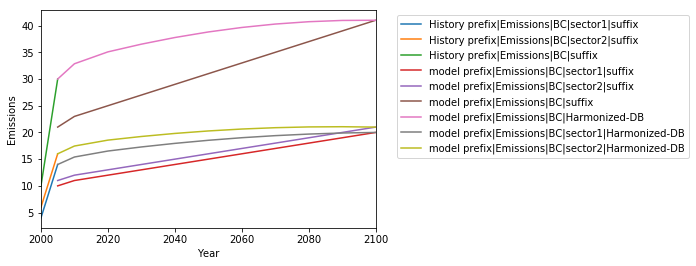

In [6]:
sns.tsplot(df, time='Year', condition='Label', value='Emissions', unit='Model')
plt.legend(bbox_to_anchor=(1.05, 1))